In [1]:
!dir

 C 드라이브의 볼륨: Yoga_256G
 볼륨 일련 번호: 3CAA-9005

 C:\Users\nitt0\Documents\Github\k_mooc_reboot\module_PyQt\statics\inis 디렉터리

2020-03-19  오후 08:12    <DIR>          .
2020-03-19  오후 08:12    <DIR>          ..
2020-03-16  오후 07:41                 0 .gitkeep
2020-03-19  오후 04:06    <DIR>          .ipynb_checkpoints
2020-03-18  오후 11:04               646 config_invisible.ini
2020-03-18  오후 11:40            32,790 fb_comments_00raw_20200318.ini
2020-03-19  오후 04:47            38,000 fb_comments_01refine_20200318.json
2020-03-19  오후 04:37                 0 fb_comments_01refine_to_text_commentOnly.ini
2020-03-19  오후 04:47            26,809 fb_comments_01refine_to_text_commentOnly.txt
2020-03-19  오후 06:23            14,053 fb_comments_02refile_noun_adj_adv.txt
2020-03-19  오후 08:12            52,379 fb_comments_02refine_EDA.ipynb
               8개 파일             164,677 바이트
               3개 디렉터리  93,840,998,400 바이트 남음


In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading the JSON data using json.load()
filename = 'fb_comments_01refine_20200318.json'
with open(filename, mode='r', encoding='utf8') as f:
    dict_comment = json.load(f)
    
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_comment, orient='index')
df.reset_index(level=0, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
index      126 non-null object
name       126 non-null object
comment    126 non-null object
likes      126 non-null object
dtypes: object(4)
memory usage: 4.0+ KB


In [5]:
likes_count = [ int(likes[0:-3]) for likes in df['likes'].values]
df['likes_count'] = pd.Series(likes_count)

# df.sort_values('likes_count', ascending=False)

df['index'] = pd.to_numeric(df['index'])
df['comment'] = df.comment.str.replace('[[데분커],]' , '')

show_cols = ['index', 'comment', 'likes_count']
df[show_cols].sort_values('index', ascending=True)        # order by time_order('index') = 글쓴순서로 나열
df[show_cols].sort_values('likes_count', ascending=False) # order by 'likes_count' = 좋아요 갯수로 나열

C:\Anaconda3\lib\site-packages\pandas\core\strings.py:569: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


,index,comment,likes_count
115,9,입맛대로 블랙리스트랑 다를게 없을 것 같은데요...,55
24,12,기레기 판단의 labelling 하는 사람의 정치색이 labelling 결과의 몹시...,41
93,7,제가 잘 몰라서 나오는 질문입니다만기레기인지 판단하기 위한 labelling 은 누...,32
1,1,그 기사가 가짜라는 것을 어떻게 판별하나요?,22
35,17,자기 맘에 안들면 기레기인가요? ㅋㅋㅋㅋㅋㅋㅋㅋ 무슨 빅브라더도 아니고 어쨌든 빅브...,19
64,43,한국 기자를 외신이 비판하는 근거중 하나가. 출처의 미비입니다. 익명의 제보자 익명...,19
15,111,[데분커] 근데 그 라벨링은 누가 하나요? 개인의 정치관에 따라서 달라질텐데요......,13
6,103,제 생각에 가짜뉴스 문제는 기술이 아닌 교육으로 해결해야 할 것 같습니다. 기사를 ...,11
42,23,그런게 생긴다면 언론 통제와 탄압에 사용되는 역효과를 내지 않을까... 싶네요,10
90,67,기레기를 거르는 프로그램을 만들지 마시고 팩트만 쓰는 기자 프로그램을 만드시는게 어...,9


count    126.000000
mean       3.206349
std        7.281008
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       55.000000
Name: likes_count, dtype: float64

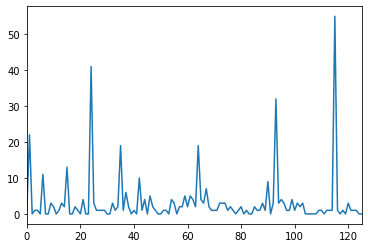

In [6]:
df.likes_count.plot()
df['likes_count'].describe()